# 특성공학

- 교차검증 소개
- 차원 축소
- SelectKBest
- PCA
- t-SNE
- 클러스터링

# 차원축소
## 차원 선택(축소) 방법
- 1) 사람이 경험으로 선택하는 방법
- 2) SelectKBest: 목적 변수와의 상관 관계가 큰 특성 선택
- 3) PCA: 특성(입력 변수들) 간의 독립적인 성분을 기준으로 차원을 축소

## 시각화를 위한 차원 축소
- t-SNE: 시각화를 위한 2또는 3차원 차원 축소 

# import

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (8,8)

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
## 유방암 진단 데이터 다운로드

cancer = load_breast_cancer()

In [30]:
cancer.target[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [31]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [32]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [33]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
print(X.shape)
X[:3]

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [34]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

# 교차 검증

- 교차 검증을 수행하는 함수 정의

In [35]:
# n 세트의 훈련용과 검증용 데이터를 랜덤하게 나눈다
# 디폴트 값은 shuffle=False 인 것을 주의해야 한다

def cross_validation(model, X, y, n=5): 
    cv = KFold(n, shuffle=True)
    return cross_val_score(model, X, y, cv=cv).mean().round(4)

## 랜덤 포레스트 모델 사용

- 30개의 특성을 모두 사용하는 경우

In [36]:
rfc = RandomForestClassifier() # 모델 선택
cross_validation(rfc, X, y, 10) # 교차 검증 결과 (평균 정확도)

0.9526

# SelectKBest

- 목적변수 y와의 상관 관계가 큰 특성을 k개 선택

In [37]:
from sklearn.feature_selection import SelectKBest, chi2
sb = SelectKBest(chi2, k=2)
X_best = sb.fit_transform(X, y)
print(X_best.shape)

# 선택된 특성 컬럼명 보기
print('Selected Features: ')
print(list(X.columns[sb.get_support()]))
cross_validation(rfc, X_best, y)

(569, 2)
Selected Features: 
['mean area', 'worst area']


0.9227

In [38]:
sb.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False])

## 두개 특성의 산포도 그리기

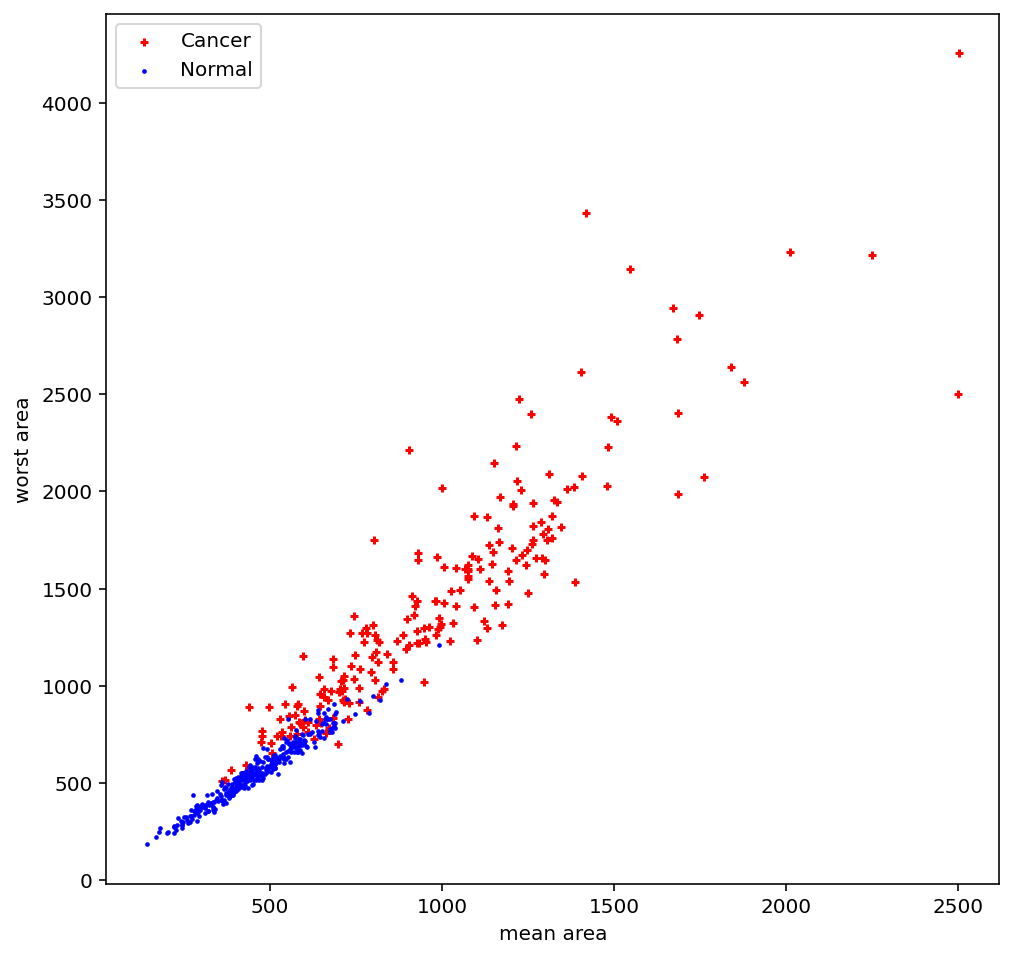

In [39]:
## 두 개 특성 공간의 산포도 그리기

plt.scatter(X_best[:,0][y==0],X_best[:,1][y==0],
            marker='+', s=13, color='r', label='Cancer')
plt.scatter(X_best[:,0][y==1],X_best[:,1][y==1],
            marker='.', s=7, color='b', label='Normal')
plt.xlabel('mean area')
plt.ylabel('worst area')
plt.legend()

# PCA를 사용한 차원 축소

## PCA 개념
<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-10-04%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.24.09.png?raw=1" align='left'  width=300>

0.9315


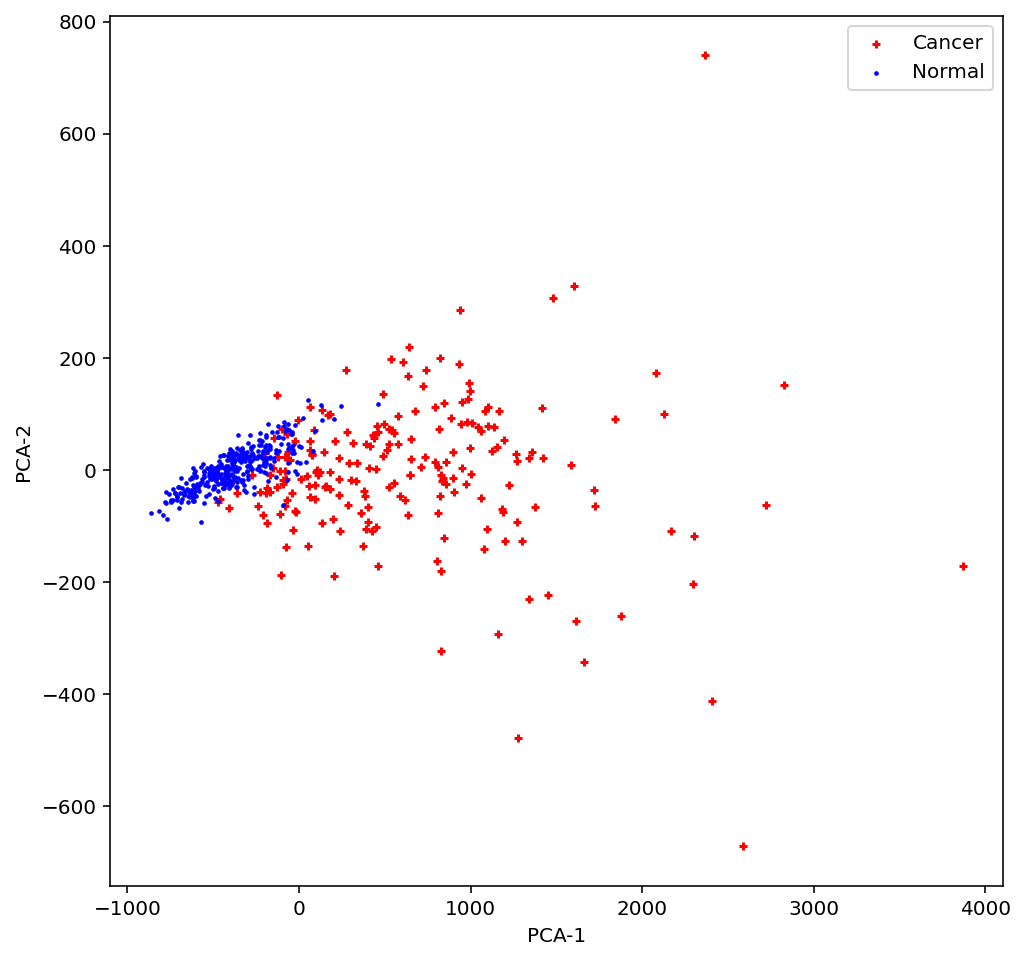

In [40]:
## 2개의 주성분(PCA)을 사용하는 경우

pca = PCA(2)
X_pca = pca.fit_transform(X)
print(cross_validation(rfc, X_pca, y))

# 두 개 주성분을 축으로 산포도 그리기
plt.scatter(X_pca[:,0][y==0],X_pca[:,1][y==0],
            marker='+', s=13, color='r', label='Cancer')
plt.scatter(X_pca[:,0][y==1],X_pca[:,1][y==1],
            marker='.', s=7, color='b', label='Normal')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.legend()

## pca 생성에 사용한 가중치

In [41]:
# pca 생성시에 기존 특성의 가중합을 사용한다
# 가중치를 보는 내부 변수는 components_이다

print(pca.components_.round(3))

[[ 0.005  0.002  0.035  0.517  0.     0.     0.     0.     0.    -0.
   0.    -0.     0.002  0.056 -0.     0.     0.     0.    -0.    -0.
   0.007  0.003  0.049  0.852  0.     0.     0.     0.     0.     0.   ]
 [ 0.009 -0.003  0.063  0.852 -0.    -0.     0.     0.    -0.    -0.
  -0.     0.     0.001  0.008  0.     0.     0.     0.     0.     0.
  -0.001 -0.013 -0.    -0.52  -0.    -0.    -0.    -0.    -0.    -0.   ]]


In [42]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

- PCA는 샘플을 저차원 특성공간에서 (보통 2차원) 분포를 파악할 때 자주 사용된다 


<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.31.41.png?raw=1" align='left'  width=400>

# t-SNE 시각화

- T-distributed Stochastic Neighbor Embedding
- 실행할 때마다 다른 패턴을 보여준다
- perplexity를 바꾸면 그림이 다르게 나타난다
- 데이터 패턴을 설명하기 가장 좋은 그림을 택하면 된다
- PCA의 2차원 패턴은 하나로 고정된다

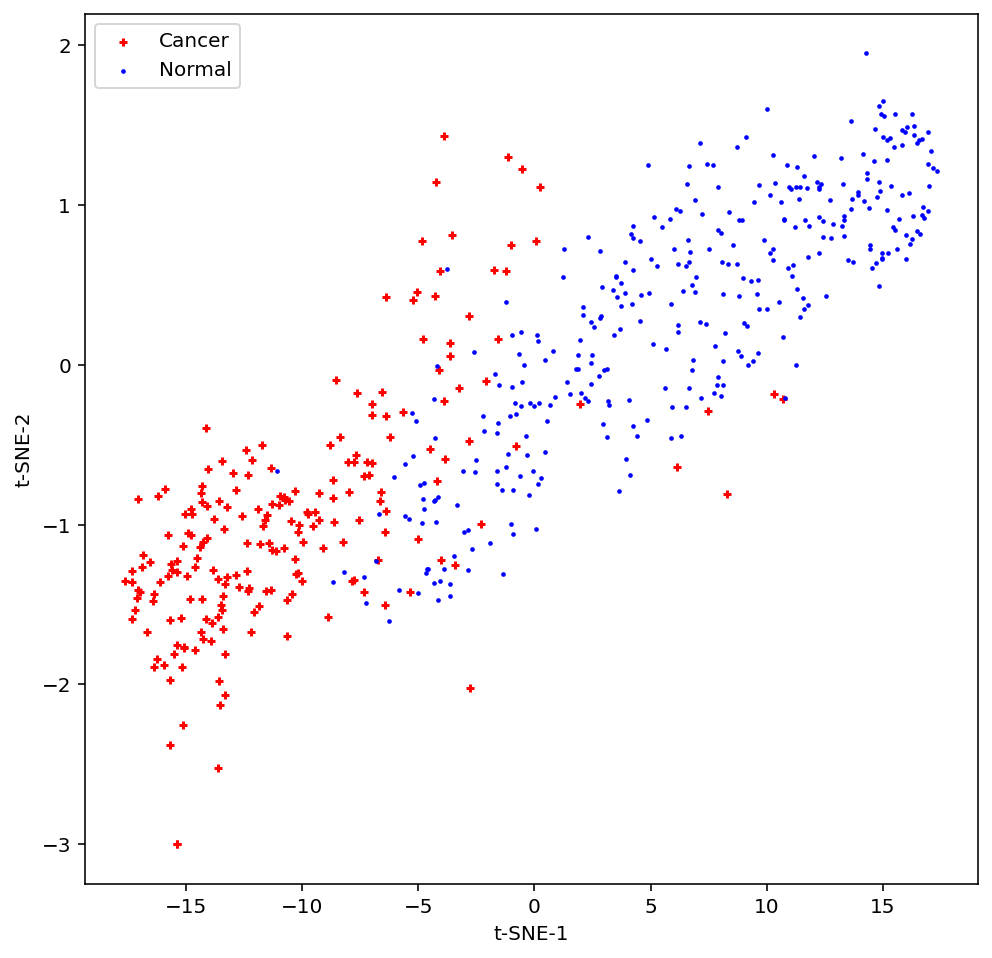

In [43]:
## 2차원 t-SNE 수행과 시각화

tsne = TSNE(2, perplexity=100)
tsne_2 = tsne.fit_transform(X)


plt.scatter(tsne_2[:,0][y==0],tsne_2[:,1][y==0],
            marker='+', s=13, color='r', label='Cancer')
plt.scatter(tsne_2[:,0][y==1],tsne_2[:,1][y==1],
            marker='.', s=7, color='b', label='Normal')

plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')
plt.legend()

## 주성분 수에 따른 성능 변화

In [44]:
result = []

for k in range(2,11):
    pca = PCA(k)
    X_pca = pca.fit_transform(X)
    result.append((k, cross_validation(rfc, X_pca, y)))

<AxesSubplot:xlabel='k'>

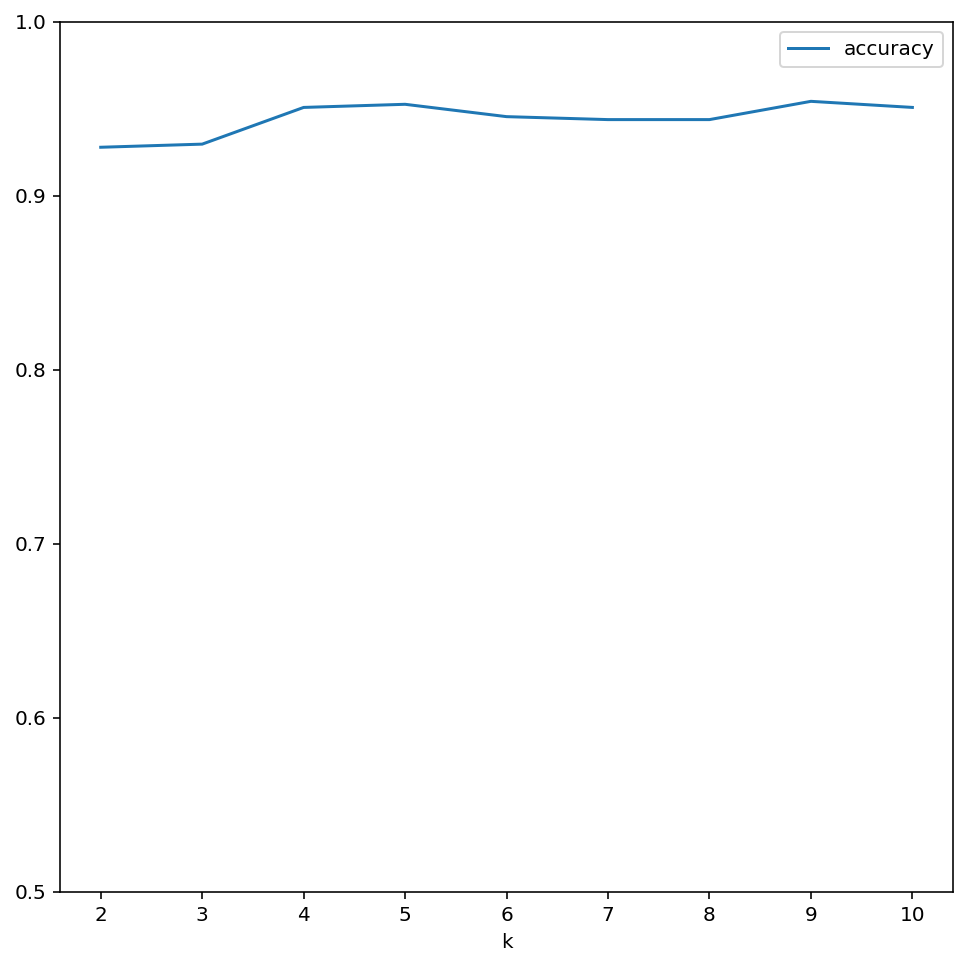

In [45]:
df = pd.DataFrame(result, columns=['k','accuracy'])
df = df.set_index('k')
df.plot(ylim=(0.5,1))

In [46]:
df

,accuracy
k,
2,0.9279
3,0.9297
4,0.9508
5,0.9526
6,0.9455
7,0.9438
8,0.9438
9,0.9543
10,0.9508


# 클러스터링
- 특성 공간에서 성격이 비슷한 샘플들을 같은 그룹으로 묶는 작업
- 군집화라고 한다
- 적절한 클러스터 갯수를 찾는 것이 중요하다

# kMeans 클러스터링

In [47]:
X[:3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [48]:
## 클러스터링 수행 후 클러스터 번호 추가
K = 5 # 나눌 클러스터 수

df = X.copy()

kmeans = KMeans(K).fit(df)

# 샘플별로 속한 클러스터 번호 보기
df["Cluster"] = kmeans.labels_
df[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,3
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,3
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3


In [49]:
# 각 클러스터에 속한 샘플 수 보기
print(df["Cluster"].value_counts())

0    237
4    180
1     68
3     68
2     16
Name: Cluster, dtype: int64


# 최적의 클러스터 수 찾기

- 아래와 같이 세가지 방법을 주로 사용한다
 - 덴드로그램
 - 실루엣 지수 보기
 - mass(inertia)의 변화 보기

## 덴드로그램

In [50]:
# 클러스터 번호는 정보가 아니므로 X에서 삭제

df = df.drop('Cluster', axis=1)
df[:3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


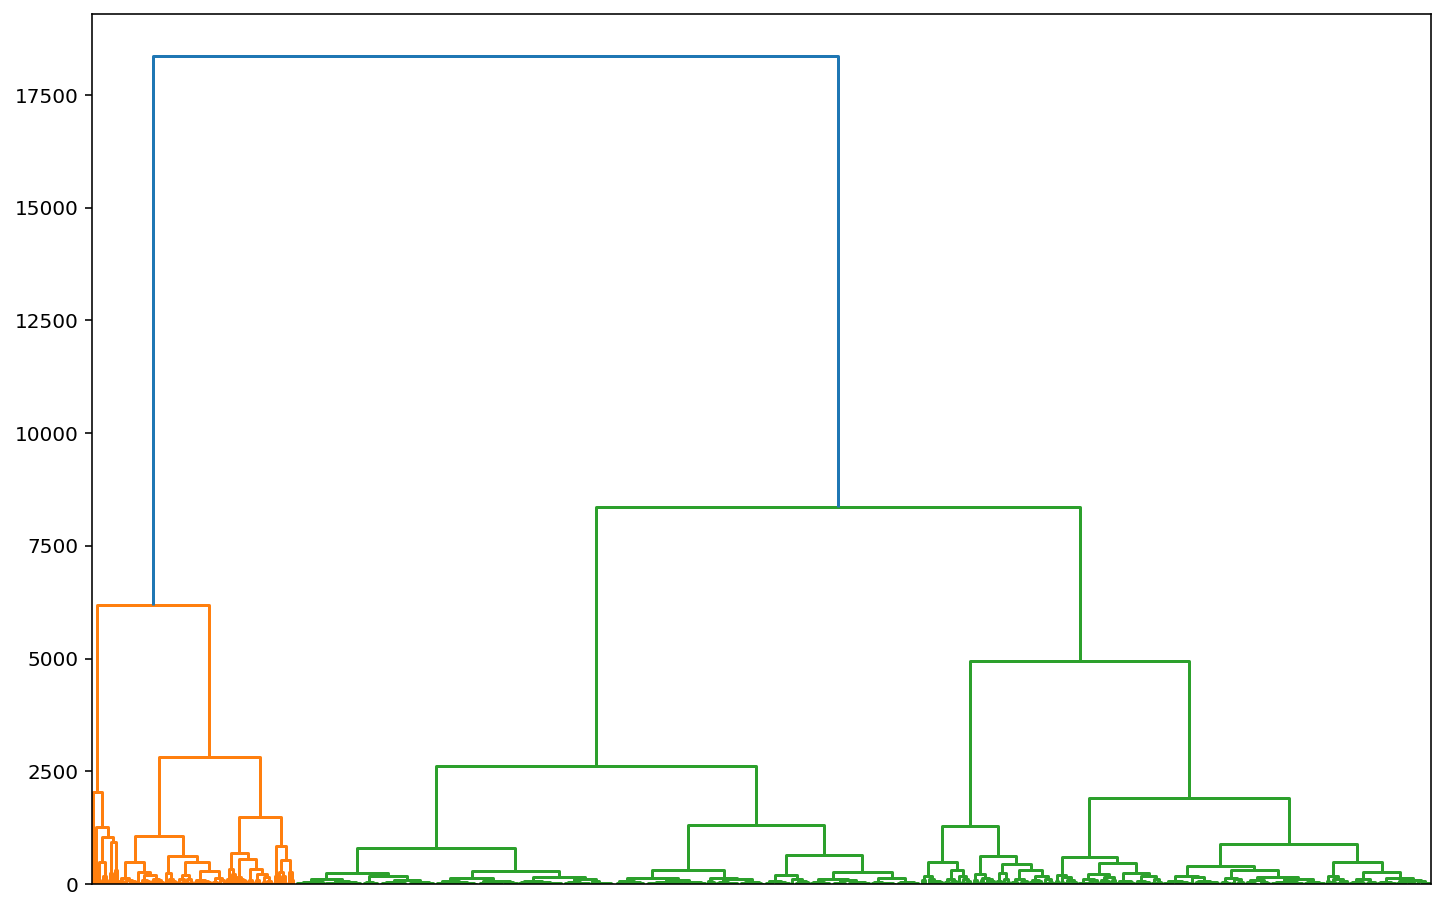

In [51]:
## 덴드로그램

plt.figure(figsize=(12, 8))
link_dist = linkage(df, metric='euclidean', method='ward')  
dendrogram(link_dist, labels=df.index.tolist())
plt.xticks([])
plt.show()

## 실루엣 지수

- $\frac{(b-a)}{max(a,b)}$ **a**는 클러스터 내의 평균 거리이고 **b** 는 클러스트 간의 평균 거리
- 실루엣 지수는 1에 가까울수록 클러스터링이 잘 수행된 것

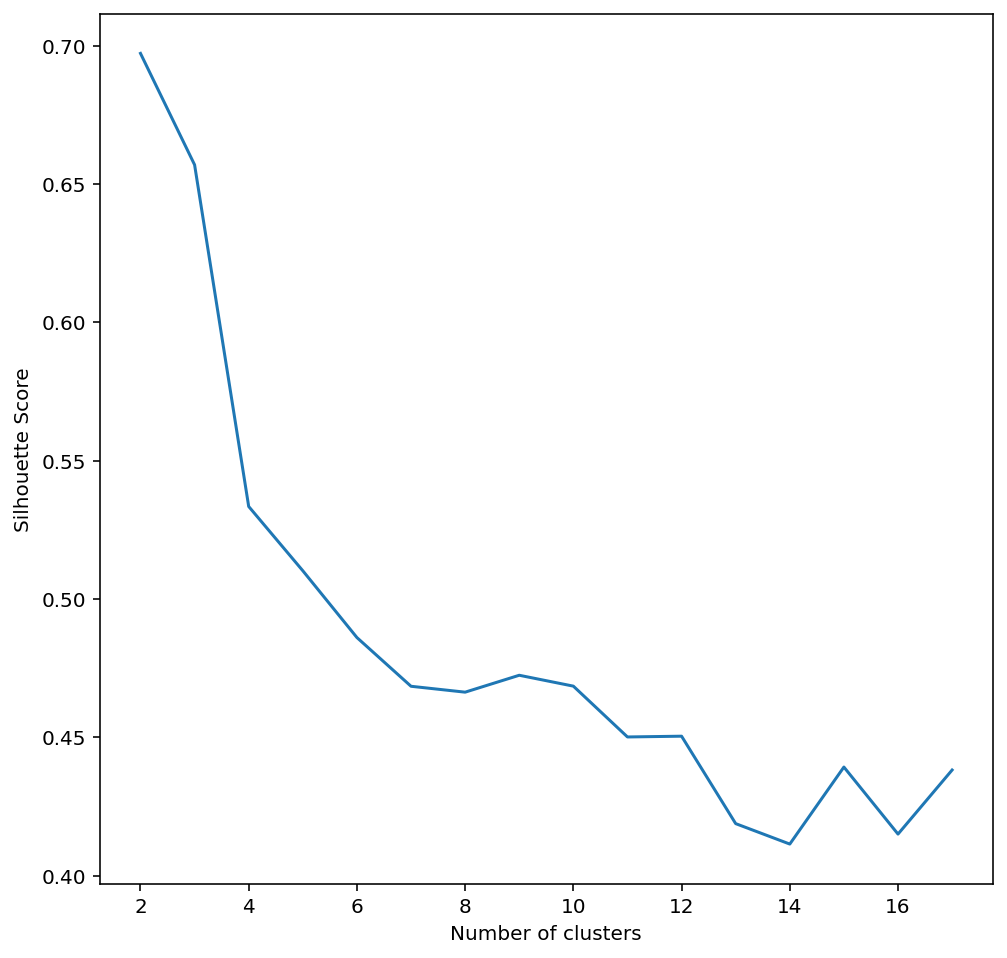

In [52]:
## 클러스터 수에 따른 실루엣 지수 변화 보기

results = []
N = 18
for k in range(2,N):
  cluster_labels = KMeans(k).fit_predict(df)
  score = silhouette_score(df, cluster_labels)
  results.append(score)

plt.plot(range(2,N), results)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

## knee 포인트

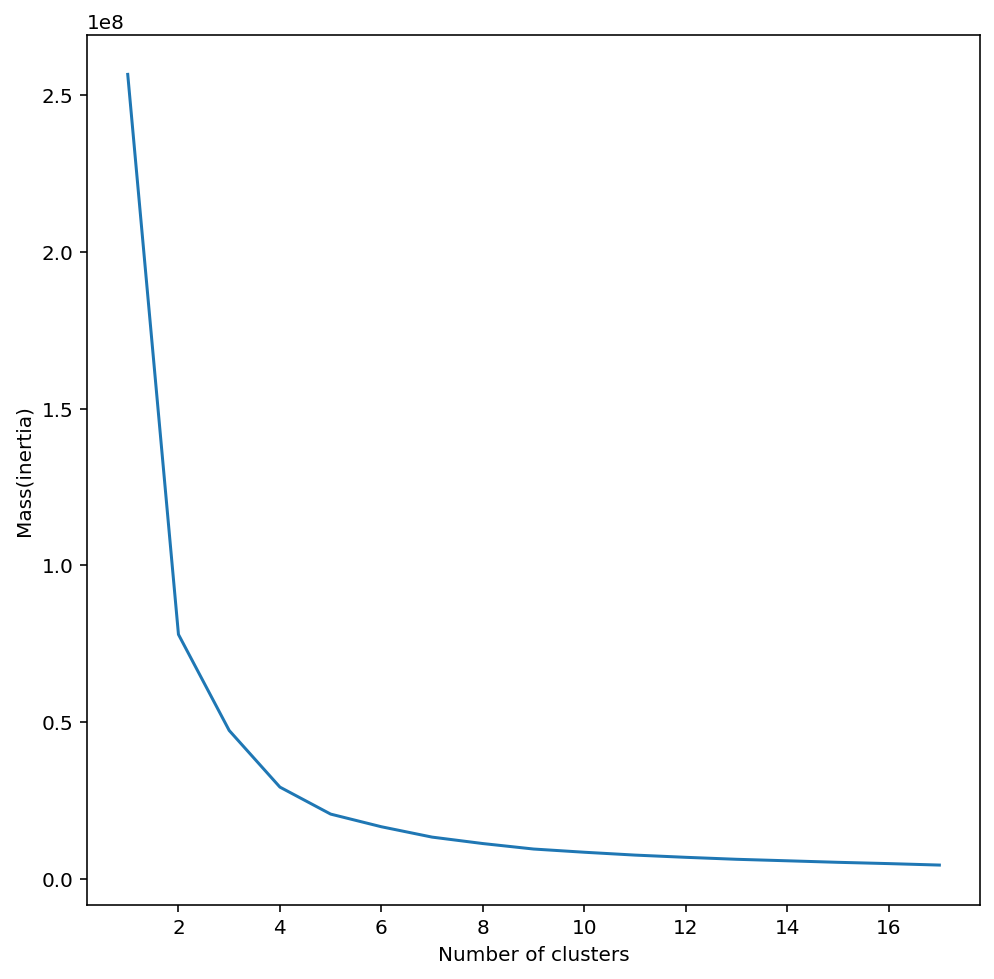

In [53]:
# elbow 포인트 (knee 포인트라고도 한다)를 찾는다
# 클러스터의 무게(inertia) 변화 곡선 보기, 무게는 클러스터내 샘플간의 거리에 비례하는 값

mass = []
for i in range(1, N):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    mass.append(kmeans.inertia_)
plt.plot(range(1, N), mass)
plt.xlabel('Number of clusters')
plt.ylabel('Mass(inertia)')
plt.show()

# 최적의 클러스터링 수행

In [54]:
## 최적의 클러스터 수 지정
K=4
kmeans = KMeans(K).fit(df)

## 임의의 특성 공간에서 산포도 그리기

- 임의의 두 특성 공간에서 그리기

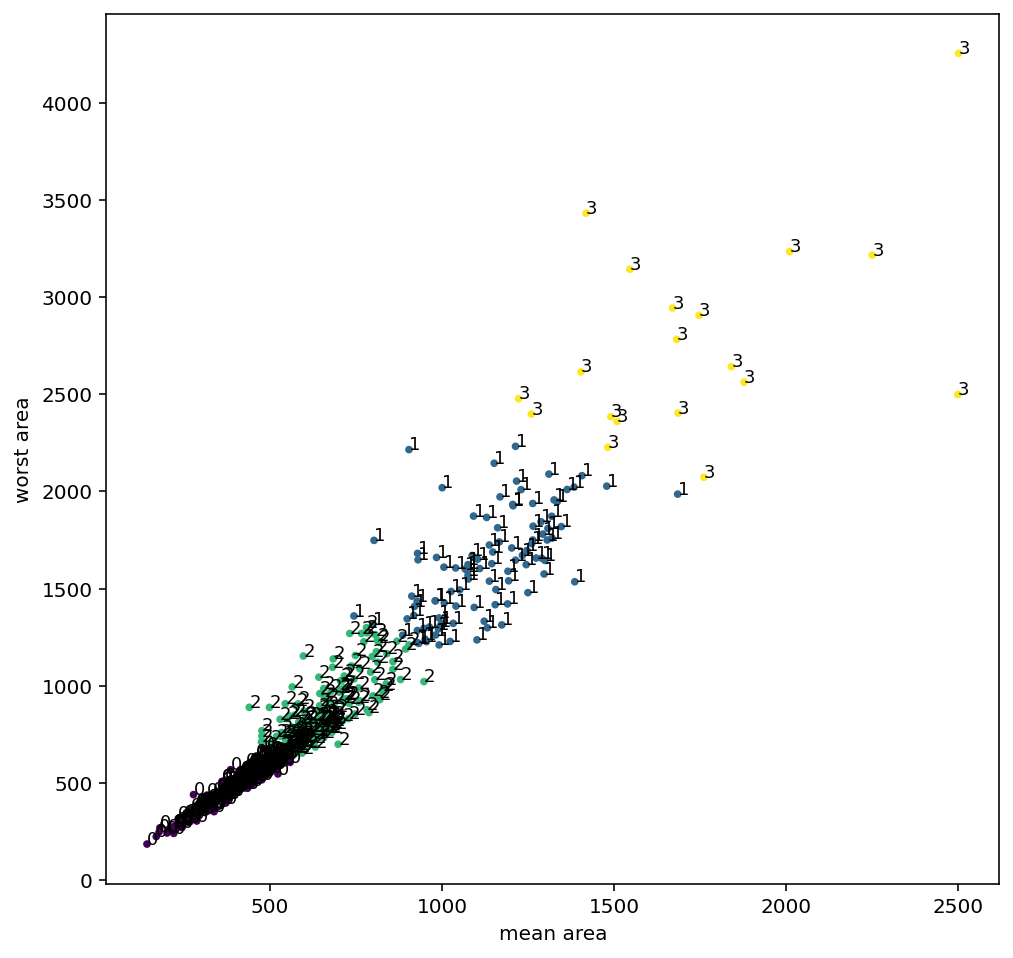

In [55]:
## mean area, worst area 특성 공간 산포도

# 산포도 그리기
plt.scatter(df['mean area'], df['worst area'], 
            c=kmeans.labels_, s=8) 
plt.xlabel('mean area')
plt.ylabel('worst area')

# 클러스터 번호 쓰기
for n in range(df.shape[0]):
    plt.text(df['mean area'][n], df['worst area'][n],
             kmeans.labels_[n],
            fontsize=9)

## PCA(2) 공간상에서 산포도 그리기

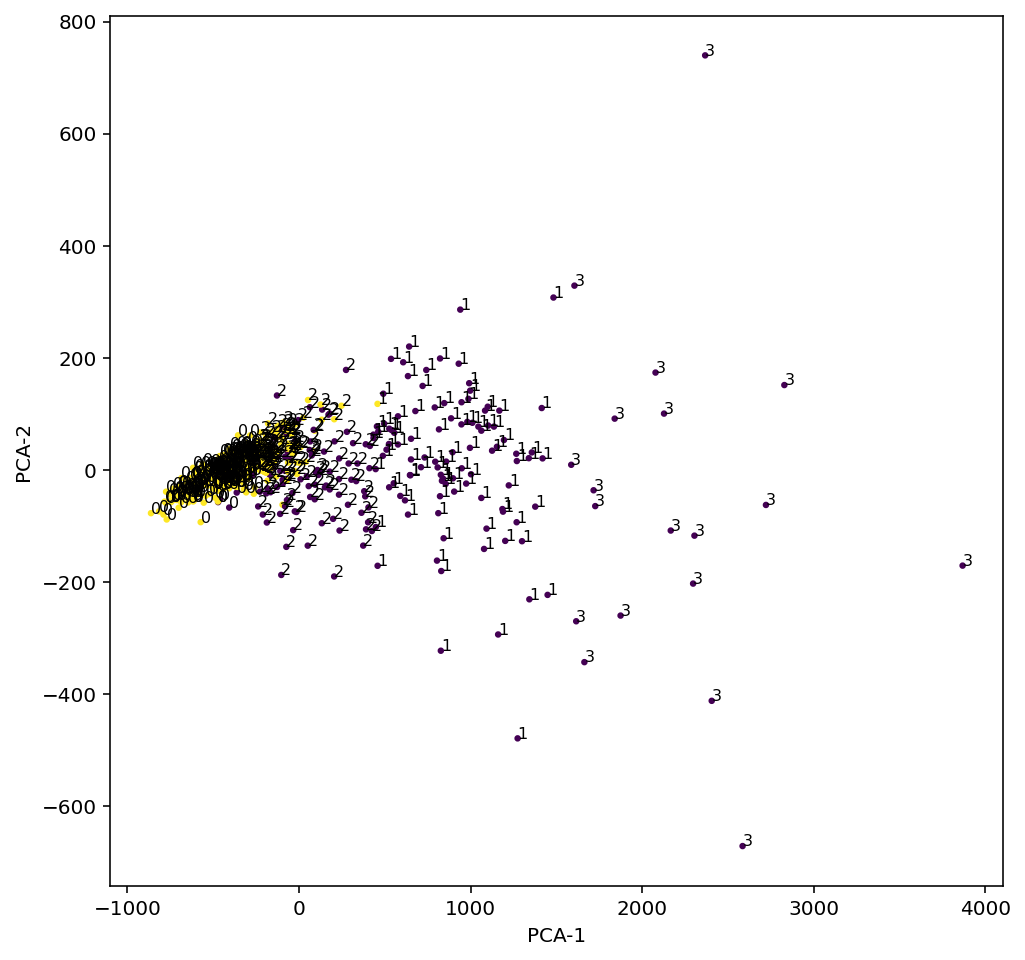

In [56]:
## PCA(2) 공간상에서 산포도 그리기

pca = PCA(2)
X_pca2 = pca.fit_transform(df)

# 산포도 그리기
plt.scatter(X_pca2[:,0],X_pca2[:,1], c=y, s=5)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')

# 클러스터 번호 쓰기
for n in range(df.shape[0]):
    plt.text(X_pca2[:,0][n], X_pca2[:,1][n],
         kmeans.labels_[n],fontsize=8)

In [57]:
# 클러스터 수 바꾸어 보기
K = 5 
kmeans = KMeans(K).fit(df)

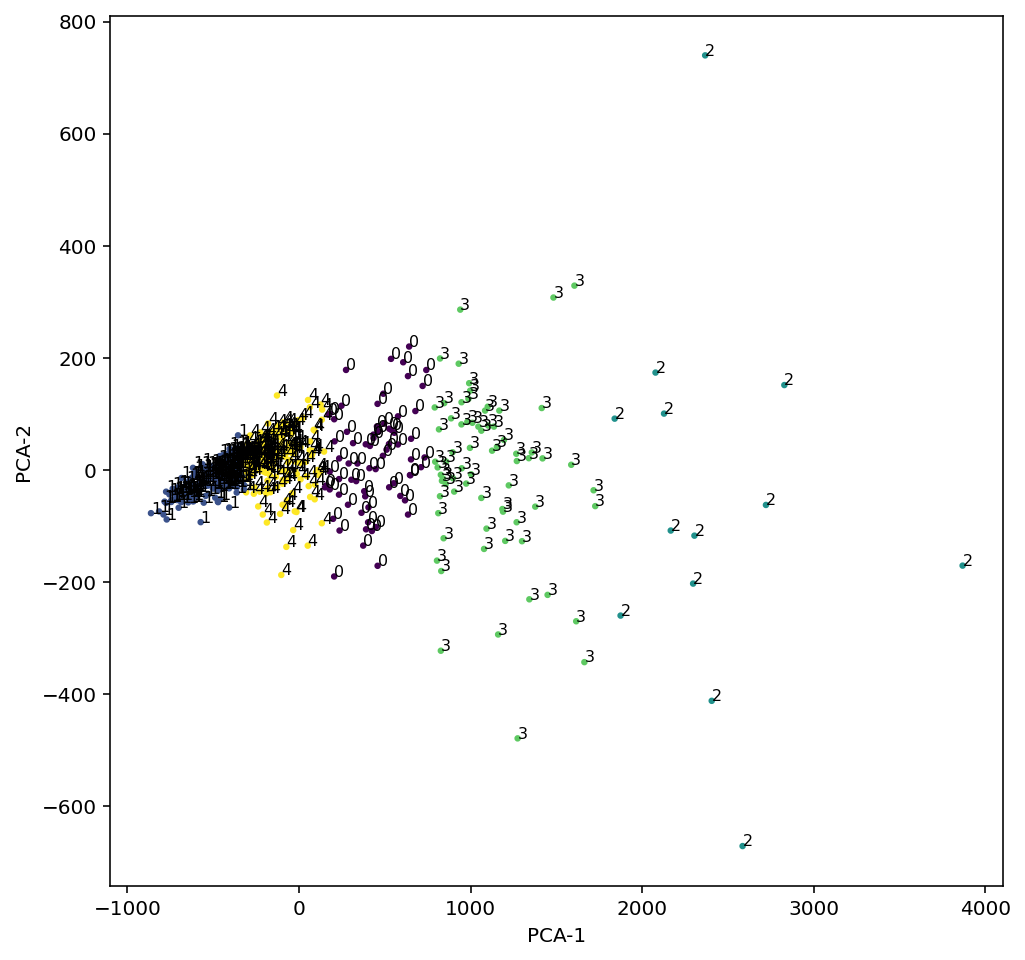

In [58]:
## PCA(2) 공간 상에서 산포도 그리기

# pca = PCA(2)
# X_pca2 = pca.fit_transform(df)

# 산포도 그리기
plt.scatter(X_pca2[:,0],X_pca2[:,1], c=kmeans.labels_, s=5)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')

# 클러스터 번호 쓰기
for n in range(df.shape[0]):
    plt.text(X_pca2[:,0][n], X_pca2[:,1][n],
         kmeans.labels_[n],fontsize=8)